In [1]:
from pathlib import Path
from tqdm import tqdm
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
running_keys = ["RUNNING", "TREADMILL_RUNNING"]

In [3]:
time_and_distance = {
    "date_and_time": [],
    "distance": [],
    "duration": [],
}

session_files = list(Path("data/raw").glob("training-session*.json"))

for session_file in tqdm(session_files):
    with open(session_file, "r") as f:
        session_data = json.load(f)

    exercises = session_data["exercises"]

    for exercise in exercises:
        if exercise["sport"] not in running_keys:
            continue

        time_and_distance["date_and_time"].append(session_data["startTime"])
        time_and_distance["distance"].append(exercise["distance"])
        time_and_distance["duration"].append(exercise["duration"])

100%|██████████| 1292/1292 [00:08<00:00, 145.41it/s]


In [4]:
df = pd.DataFrame(time_and_distance)
# df["date_and_time"] = pd.to_datetime(df["date_and_time"], unit="ms")
# df["distance"] = df["distance"].astype(float) / 1000  # Convert to km
# df["duration"] = pd.to_timedelta(df["duration"], unit="s")
# df = df.sort_values(by="date_and_time").reset_index(drop=True)

df

,date_and_time,distance,duration
0,2020-05-26T14:49:02.797,2678.199951,PT1479.505S
1,2021-06-07T07:54:14.469,2623.699951,PT861.751S
2,2022-01-01T13:01:46.655,6240.399902,PT2131.001S
3,2022-08-09T14:44:33.639,4625.700195,PT2311.253S
4,2021-11-02T19:52:58.011,4230.399902,PT1674.628S
...,...,...,...
453,2020-05-13T17:56:05.715,3112.600098,PT2484.878S
454,2021-01-12T11:35:17.419,4375.299805,PT2019.377S
455,2019-09-19T18:37:39.274,5675.200195,PT1896.624S
456,2022-11-06T07:02:23.561,20803.000000,PT5945.002S


In [5]:
df["date_and_time"] = pd.to_datetime(df["date_and_time"])
df["distance"] = df["distance"].astype(float) / 1000  # Convert to km

df

,date_and_time,distance,duration
0,2020-05-26 14:49:02.797,2.6782,PT1479.505S
1,2021-06-07 07:54:14.469,2.6237,PT861.751S
2,2022-01-01 13:01:46.655,6.2404,PT2131.001S
3,2022-08-09 14:44:33.639,4.6257,PT2311.253S
4,2021-11-02 19:52:58.011,4.2304,PT1674.628S
...,...,...,...
453,2020-05-13 17:56:05.715,3.1126,PT2484.878S
454,2021-01-12 11:35:17.419,4.3753,PT2019.377S
455,2019-09-19 18:37:39.274,5.6752,PT1896.624S
456,2022-11-06 07:02:23.561,20.8030,PT5945.002S


In [6]:
df["duration"] = pd.to_timedelta(df["duration"]).dt.total_seconds()

df

,date_and_time,distance,duration
0,2020-05-26 14:49:02.797,2.6782,1479.505
1,2021-06-07 07:54:14.469,2.6237,861.751
2,2022-01-01 13:01:46.655,6.2404,2131.001
3,2022-08-09 14:44:33.639,4.6257,2311.253
4,2021-11-02 19:52:58.011,4.2304,1674.628
...,...,...,...
453,2020-05-13 17:56:05.715,3.1126,2484.878
454,2021-01-12 11:35:17.419,4.3753,2019.377
455,2019-09-19 18:37:39.274,5.6752,1896.624
456,2022-11-06 07:02:23.561,20.8030,5945.002


In [9]:
# Order by date and time
df = df.sort_values(by="date_and_time").reset_index(drop=True)

In [10]:
# Save the DataFrame to a CSV file
save_path = Path("data/processed/running_data.csv")
save_path.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(save_path, index=False)

/var/folders/wz/m18d0_fs3bn6b22tw0x4gsk00000gn/T/ipykernel_34250/1042185574.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_distance = df.set_index('date_and_time')['distance'].resample('M').sum().reset_index()


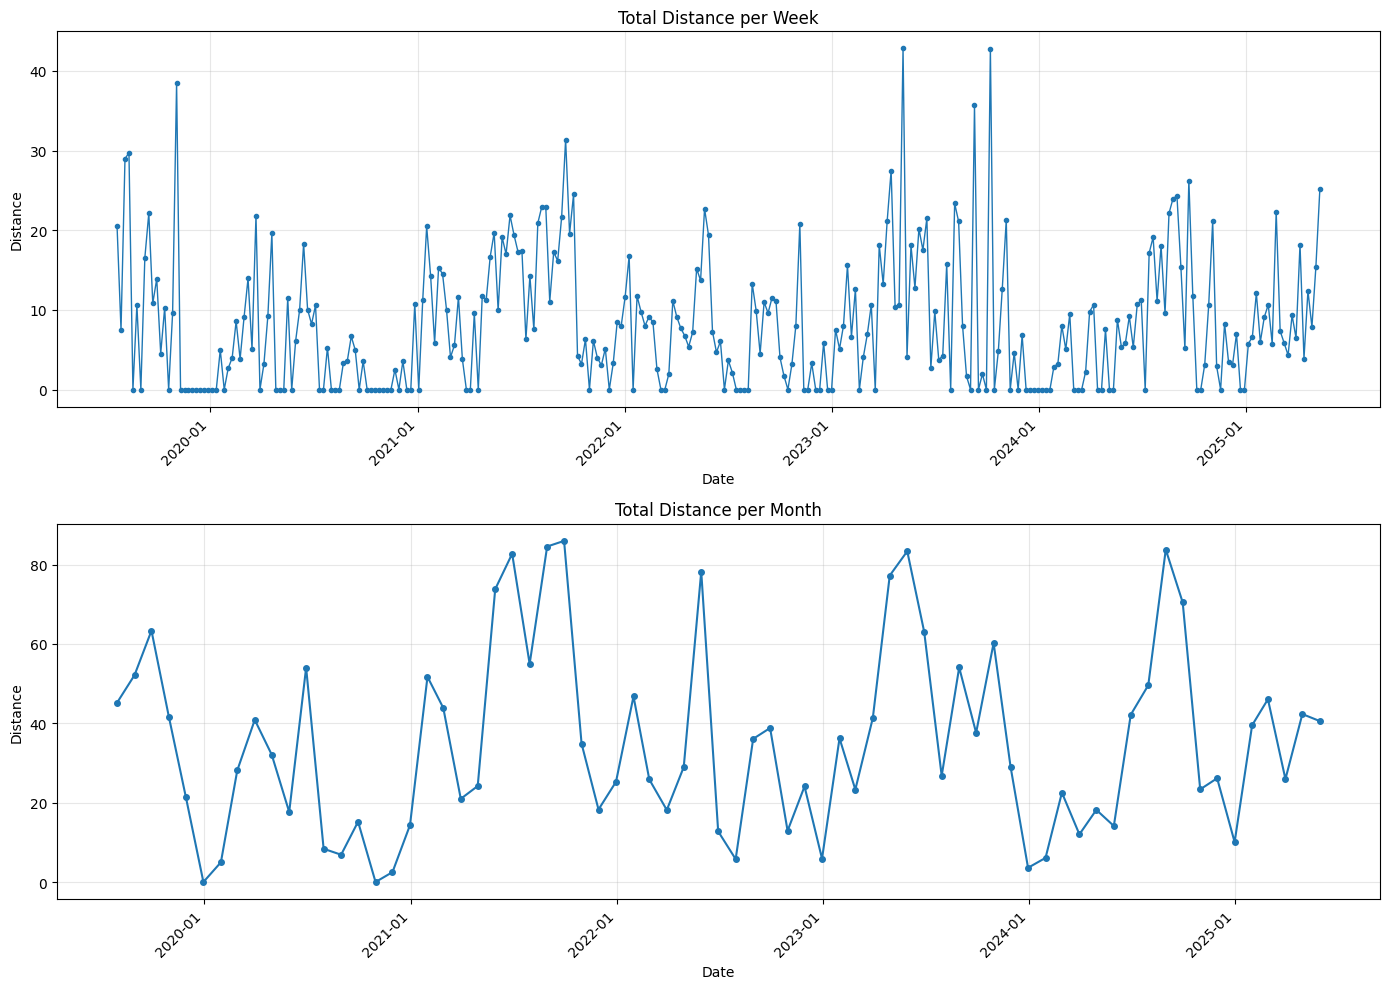

In [ ]:
# Weekly aggregation using resample
weekly_distance = (
    df.set_index("date_and_time")["distance"].resample("W").sum().reset_index()
)

# Monthly aggregation
monthly_distance = (
    df.set_index("date_and_time")["distance"].resample("M").sum().reset_index()
)

# Create plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Weekly plot - line plot with markers
ax1.plot(
    weekly_distance["date_and_time"],
    weekly_distance["distance"],
    marker="o",
    markersize=3,
    linestyle="-",
    linewidth=1,
)
ax1.set_title("Total Distance per Week")
ax1.set_xlabel("Date")
ax1.set_ylabel("Distance")
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")

# Monthly plot - line plot with markers
ax2.plot(
    monthly_distance["date_and_time"],
    monthly_distance["distance"],
    marker="o",
    markersize=4,
    linestyle="-",
    linewidth=1.5,
)
ax2.set_title("Total Distance per Month")
ax2.set_xlabel("Date")
ax2.set_ylabel("Distance")
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right")

# Add grid for readability
ax1.grid(True, alpha=0.3)
ax2.grid(True, alpha=0.3)

# Format x-axis date labels to be more readable
from matplotlib.dates import DateFormatter

ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
ax2.xaxis.set_major_formatter(DateFormatter("%Y-%m"))

plt.tight_layout()
plt.show()